In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/spam_detection.csv')

# Display the first few rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


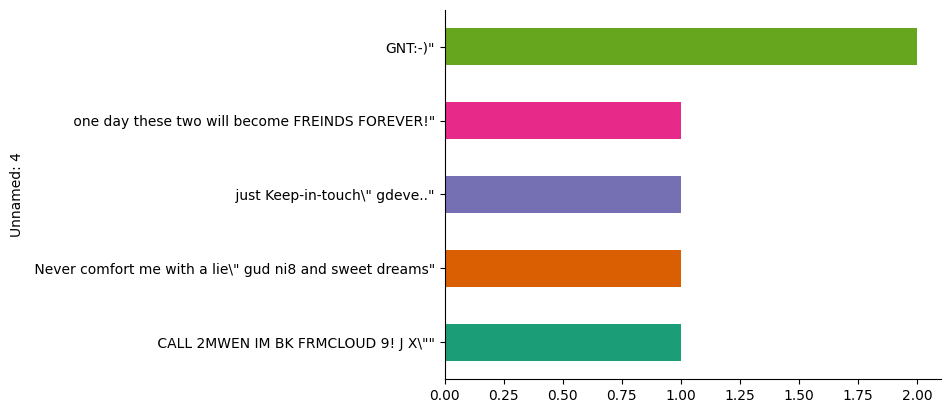

In [31]:
# @title Unnamed: 4

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

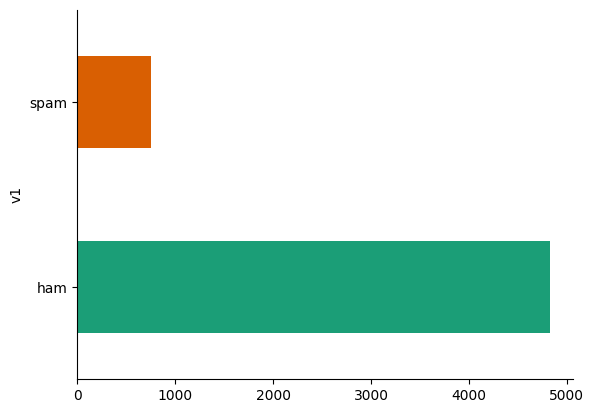

In [26]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


In [28]:
# Apply text cleaning to the dataset
df['text_cleaned'] = df['v2'].apply(clean_text)

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['v1'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9650224215246637
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 39 111]]


**The output you've got shows that the logistic regression model is performing quite well on the dataset.**

**The accuracy is approximately *96.5%*, which is a strong result.**


**Interpretation of Results:**
Accuracy: *96.5%* of the emails are correctly classified as either spam or ham (not spam).


**Precision and Recall : For ham (non-spam) emails:**

* **Precision**: *96%*

* **Recall**: *100%*

* **F1-score**: *98%*

**Precision and Recall : For spam emails:**

* **Precision**: *100%*

* **Recall**: *74%*

* **F1-score**: *85%*

**Confusion Matrix:**

* True Positives (ham): 965
* False Positives (ham classified as spam): 0
* True Negatives (spam): 111
* False Negatives (spam classified as ham): 39

**Analysis:**

1. The model is highly precise for spam emails (100% precision), meaning when it classifies an email as spam, it is almost always correct.
2. The recall for spam is lower (74%), indicating that the model misses some spam emails (false negatives).
3. The high recall for ham emails (100%) shows that the model correctly identifies all ham emails.

